In [ ]:
# execute this cell before you start
import time

import tensorflow as tf
import tensorflow.keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2024-02-19 12:23:27.422288: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.15.0


# Q1 The MNIST data

It seems that no course on Machine Learning is complete, without training a network on the famous [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database) of handwritten digits.  You can access them through `keras.datasets.mnist.load_data()`.

The tasks for the first assignment is therefore:

a) (2 marks) Reproduce the results of L03, but now use the original MNIST dataset.  Comment on your observations on the differences between the datasets.

#### Loading and Normalising the Data

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

The mnist dataset does not require class names as the base integer values align with the dataset

#### The Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              # loss = 'mean_squared_error'
              metrics=['accuracy'])

start = time.time()
model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)
end = time.time()
print("Time:", (end-start), "s")
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 2s 922us/step - loss: 0.2550 - accuracy: 0.9266
Epoch 2/5
1875/1875 [==============================] - 2s 879us/step - loss: 0.1108 - accuracy: 0.9678
Epoch 3/5
1875/1875 [==============================] - 2s 898us/step - loss: 0.0751 - accuracy: 0.9780
Epoch 4/5
1875/1875 [==============================] - 2s 888us/step - loss: 0.0565 - accuracy: 0.9827
Epoch 5/5
313/313 [==============================] - 0s 575us/step - loss: 0.0685 - accuracy: 0.9787
Time: 12.863981485366821 s
Test loss: 0.06849074363708496
Test accuracy: 0.9786999821662903


The training accuracy accuracy of the mnist dataset is higher than the fashion mnist dataset, however the fashion mnist dataset has a greater rate of improvement. mnist = ~6.6% improvement, fashion mnist = ~8% improvement. This is likely because the mnist dataset is a collection of integer values which are easier to interpret than cloting items which give rise to a higher chance of error. Because the mnist dataset is more easily classified it has both a higher starting and ending accurracy, which is considerably high. Whereas the fashion mnist dataset has a lower accurracy overall likely allowing for greater accurracy to be gained when improving the model.

Similarly the test accuracy for the mnist dataset is higher than the fashion mnist dataset. However, the fashion mnist has greater loss of accuracy from the training data to the test data than the mnist dataset (~3.4%, ~1% respectively). The accuracy difference between the two dataset can be seen by comparing the groups of images plotted below and the ones plotted in L3. In L3 there were 4/30 images that were mislabelled and 5/30 images that did not have 100% confidence in their image labelling. Whereas, in the plots below, they all have 100% confidence in their image labelling and all the labels are correctly matched with the images.

#### Plotting

313/313 [==============================] - 0s 845us/step


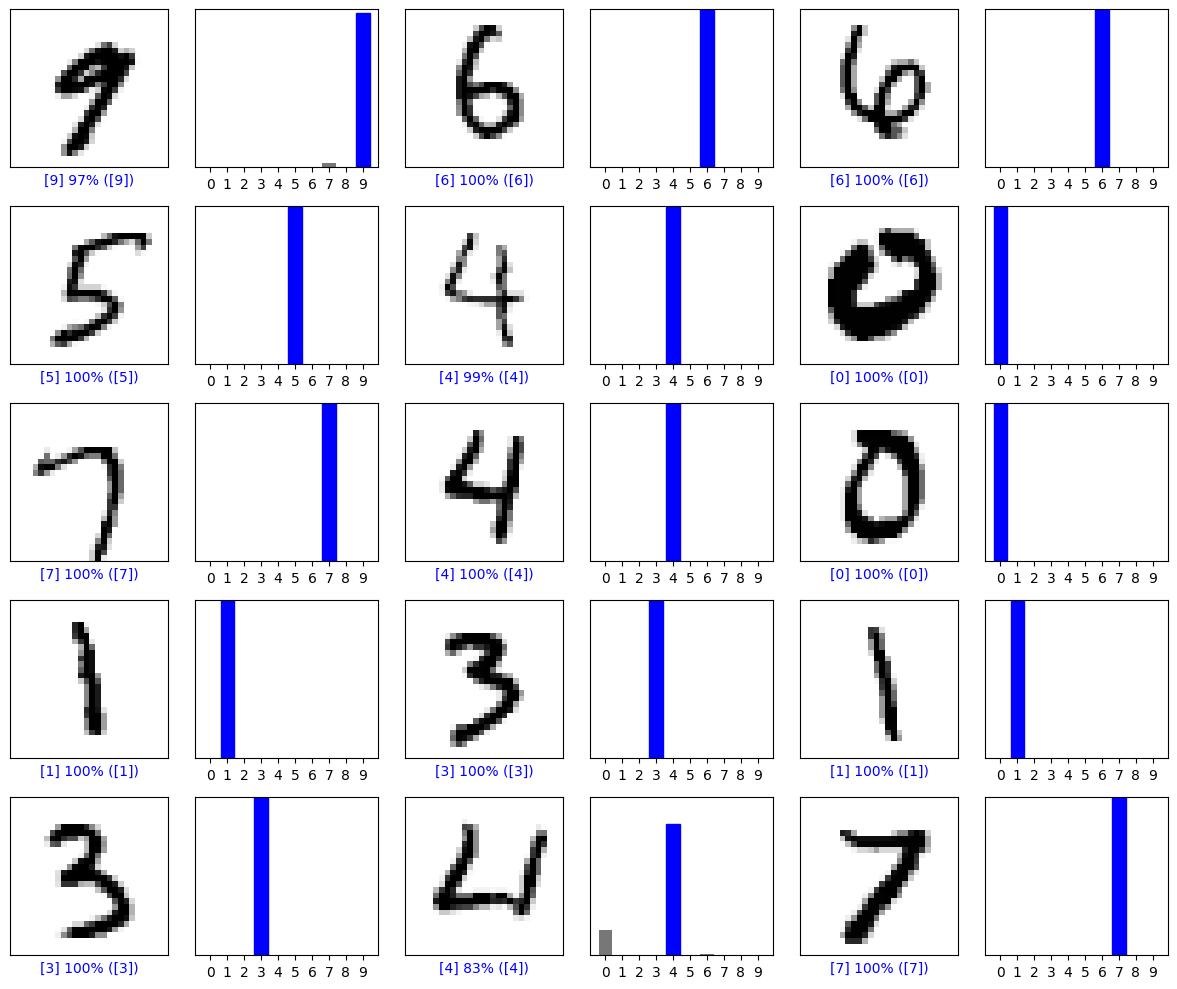

In [ ]:
predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format([predicted_label],
                                100*np.max(predictions_array),
                                [true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

offset=20
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+offset, predictions[i+offset], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+offset, predictions[i+offset], test_labels)
plt.tight_layout()
plt.show()

b) (5 marks) How can you improve the performance of the network? Here some suggestions of what you can try
   - Change the number of nodes in the hidden layer
   - Use a different loss function
   - Use a different optimizer
   - Change the number of epochs
   - Change the batch size
   - Play with a dropout layer
   - Work with different number of hidden layers
   
Explain the effect of changing parameters in your own words and draw conclusions about how performance improves.  The mark for this part will depend on the overall insight demonstrated.  Code alone does not yield marks.
Note that one aspect of performance is required training time.  Do not use code cells which take longer than 10 minutes to run on standard CPU based hardware. (Also don't use code which exceeds standard memory requirements of about 8GB RAM, but that should not be an issure here)



### Changes

Nodes

Increasing the number of nodes corresponds to an increase in computational time and an increase in accuracy. However, overfitting can occur if there is too many nodes introduced.

Increasing the number of nodes is equivalent to icnreasing the number of functions carried out on the input to give a more diverse representation of the possible label that can be given to the output. i.e. there are move diverse outputs from the hidden layer that can more accurately correspond to the correct label. This can increase the confidence and therefore accuracy the nerual network has in selecting the correct label.

An increase of 0.72% was found when increasing the number of nodes from 128-1024 and a gradual increase was observed between 128-1024. However, there is a large amount of stochasicity observed in the model which makes it difficult to accurate measure the increase due to an increase in nodes.

In [ ]:
for i in range(128, 1152, 128):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(i, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)

    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    start = time.time()
    model.fit(train_images, train_labels, epochs=5, batch_size = 32)

    test_loss, test_acc = model.evaluate(test_images, test_labels)
    end = time.time()
    print("Time:", (end-start))
    print('Test accuracy:', test_acc)
    print(i)

Loss Function

Sparse Categorical Cross Entropy is the ideal loss function to be used in this model as it can directly translate the probabilistic output of the neural network to the corresponding integer labels from the dataset. It does not require one-hot encoding like categorical cross entropy and measures the difference between the predicted probability of the class labels and the true probabilty of the class labels unlike mean squared error which  measures the squared difference between the predicted and true values.

Optimisers

The optimisers available for use in tensorflow neural networks are Adafactor, Adam, AdamW and Lion (excluding custom optimisers). Adafactor is subpar optimiser to use for this neural network without changing and adjusting the hyperparamters for this specifc model. Whereas, the other optimisers can effectively use the statistics of the gradients from the sparse categorical cross entropy loss function to improve the model, without the need to adjust the hyperparameters.

The difference between Adam and AdamW/Lion becomes more apparent when overfitting becomes a greater which is not relavent within this model unless the epoch of the model is set to a significantly large value (e.g. >100). However, this is not an issue in this model as a low epoch is being used.

Epochs

Increasing Epochs should be stopped after Epoch 100 as the training data accuracy tends towards 1 and there is no further improvement made to the test accuracy of the model excluding stochasicity. Any further increase in epoch is likely to cause overfitting in the model resulting in reduced accuracy for the testing data.

The majority of the testing accuracy difference between epoch appears to be due to stochasicity (i.e. stochasicity of the model has a greater effect than increasing epoch), however, looking at the tends of between Epoch it appears that the testing accuracy continues to increase up to 100 but at a very slow rate. Therefore it is recommended to use a lower Epoch for the optimal model as increasing the Epoch results in a low increase in testing accuracy but signiifcantly increase the computational time. 6.85 times greater computational time at 100 Epoch with only 0.35% accuracy increase.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)

])

for i in range(5, 105, 5):
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    start = time.time()
    model.fit(train_images, train_labels, epochs=i, batch_size = 32)

    test_loss, test_acc = model.evaluate(test_images, test_labels)
    end = time.time()
    print("Time:", (end-start))
    print('Test accuracy:', test_acc)
    print(i)

Epoch 1/5
1875/1875 [==============================] - 2s 928us/step - loss: 0.2587 - accuracy: 0.9266
Epoch 2/5
1875/1875 [==============================] - 2s 931us/step - loss: 0.1134 - accuracy: 0.9664
Epoch 3/5
1875/1875 [==============================] - 2s 910us/step - loss: 0.0783 - accuracy: 0.9767
Epoch 4/5
1875/1875 [==============================] - 2s 924us/step - loss: 0.0600 - accuracy: 0.9816
Epoch 5/5
313/313 [==============================] - 0s 593us/step - loss: 0.0808 - accuracy: 0.9749
Time: 9.298736572265625
Test accuracy: 0.9749000072479248
5
Epoch 1/10
 610/1875 [========>.....................] - ETA: 1s - loss: 0.0381 - accuracy: 0.9881

KeyboardInterrupt: 

Batch Size

Increasing batch size results in a lower computational time and lower accuracy. This is becasue there is less images being run through the neural network before updating the loss function. This can cause the loss function to converge more slowly towards the optimal minima or get stuck entirely into an non-optimal local minima.

Decreasing the Batch Size results in an improved accuracy until reaching a Batch Size of ~20 in which it will start to decrease. This is likely becasue low Batch sizes decrease the generalisation of the model. Low Batch Sizes can often miss underlying patterns in the data when compared to larger Batch Sizes as large Batch Sizes provide more representative information about the dataset to update the model's parameters than low Btach Sizes.

The optimal Batch Size found for increasing accuracy was 24 although there was little to no difference between 20-26 This consistency suggests that the observed variations in accuracy within this range were likely due to stochastic effects rather than significant differences in batch size. The overall increase in accuracy found by changing Batch Size was ~0.36%

However, to improve the model via computational time it would be advised to increase the Batch Size as the computational time increased by ~30% compared to the base model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)

])

for i in range(16, 32, 2):
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    start = time.time()
    model.fit(train_images, train_labels, epochs=5, batch_size = i)

    test_loss, test_acc = model.evaluate(test_images, test_labels)
    end = time.time()
    print("Time:", (end-start))
    print('Test accuracy:', test_acc)
    print(i)

Epoch 1/5
3750/3750 [==============================] - 4s 843us/step - loss: 0.2354 - accuracy: 0.9320
Epoch 2/5
3750/3750 [==============================] - 3s 830us/step - loss: 0.1020 - accuracy: 0.9689
Epoch 3/5
2177/3750 [================>.............] - ETA: 1s - loss: 0.0702 - accuracy: 0.9787

KeyboardInterrupt: 

Dropout Layer

The dropout layer is used to prevent overfitting by removing a random proportion (e.g. 0.5) of the nodes from the previous layer to prevent the neural network from relying on previously created pathways. This can help the neural network from getting stuck in a local minima.

The model was run with a dropout layer ranging from 0.2-0.8. When the Dropout layer was included in the model there was a decrease in computational time as the value for the Dropout layer increased. This is because there is a larger proportion of nodes being eliminated from the layer resulting in less input and outputs from the Dropout layer.

In regards to accuracy the dropout layer did not improve the overall accuracy of the model and any changes between it and the model excluding the droput layer is likely due to stochasicity.

Perhaps in there was greater overfitting in the model, it may increase the accuracy, however, this model does not require the dropout layer as there is little to no overfitting. Increasing the epoch along with the dropout layer also did not see an increase in accuracy apart from just the increase from the change in epoch.

Therefore, a dropout layer was not included in the final model

In [ ]:
for i in range(2, 9, 1) :
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(768, activation=tf.nn.relu),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dropout(i/10),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)

    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    start = time.time()
    model.fit(train_images, train_labels, epochs=5, batch_size = 32)

    test_loss, test_acc = model.evaluate(test_images, test_labels)
    end = time.time()
    print("Time:", (end-start))
    print('Test accuracy:', test_acc)
    print(i/10)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1977 - accuracy: 0.9391
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0900 - accuracy: 0.9729
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0666 - accuracy: 0.9800
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0511 - accuracy: 0.9844
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0801 - accuracy: 0.9787
Time: 50.79838967323303
Test accuracy: 0.9786999821662903
0.2
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2082 - accuracy: 0.9364
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0940 - accuracy: 0.9722
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0695 - accuracy: 0.9794
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0552 - accuracy: 0.9833
Epoch 5/5
313/313 [====

Hidden Layers

The first model was adding multiple identical dense layers (i.e. 5-20 dense layers of 128 nodes). This resulted in a decrease in both computational time and accuracy. This likely occurs because it is adding unnecessary complexitiy to the model without adding any computational advantage.

Bottlenecking the layers by including two high node dense layers (1024) with a low node dense layer (128) between them increases the accuracy of the base model but this is likely due to the total increase in nodes which was found to increase accuracy (see nodes), rather than a direct increase due to bottlenecking.

the optimal orintation to improve accuracy seems to be starting with a larger number of nodes and lowering the number of nodes with each dense layer which can be seen in the optimal model

The optimal orientation of hidden layers to improve accuracy seems to include a high node value in the first layer and gradually decreasing the node value through the layers. This is likely due to increase the total number of nodes but the interactions between the layers helps to improve the model more than just having a single layer with a number of nodes equalling the sum of the nodes from all layers.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)

])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()
model.fit(train_images, train_labels, epochs=5, batch_size = 32)

test_loss, test_acc = model.evaluate(test_images, test_labels)
end = time.time()
print("Time:", (end-start))
print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1907 - accuracy: 0.9419
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0887 - accuracy: 0.9732
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0616 - accuracy: 0.9812
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0492 - accuracy: 0.9850
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0915 - accuracy: 0.9765
Time: 49.54059052467346
Test accuracy: 0.9764999747276306


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)

])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()
model.fit(train_images, train_labels, epochs=5, batch_size = 32)

test_loss, test_acc = model.evaluate(test_images, test_labels)
end = time.time()
print("Time:", (end-start))
print('Test accuracy:', test_acc)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(768, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)

])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()
model.fit(train_images, train_labels, epochs=5, batch_size = 32)

test_loss, test_acc = model.evaluate(test_images, test_labels)
end = time.time()
print("Time:", (end-start))
print('Test accuracy:', test_acc)

## Optimal Model

The optimal model incluedes loss, epoc, batch, optimiser, number of nodes, layers, etc.
Why
mention it is not too long time wise but still good accuracy

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(768, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)

])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()
model.fit(train_images, train_labels, epochs=5, batch_size = 24)

test_loss, test_acc = model.evaluate(test_images, test_labels)
end = time.time()
print("Time:", (end-start))
print('Test accuracy:', test_acc)

Epoch 1/5
2500/2500 [==============================] - 13s 5ms/step - loss: 0.1929 - accuracy: 0.9408
Epoch 2/5
2500/2500 [==============================] - 13s 5ms/step - loss: 0.0910 - accuracy: 0.9725
Epoch 3/5
2500/2500 [==============================] - 13s 5ms/step - loss: 0.0650 - accuracy: 0.9801
Epoch 4/5
2500/2500 [==============================] - 13s 5ms/step - loss: 0.0523 - accuracy: 0.9837
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0704 - accuracy: 0.9810
Time: 64.94777393341064
Test accuracy: 0.9810000061988831


c) (3 marks) Write your student number on paper and take a photo. How well are the individual digits recognized? (Hint: you need to convert the photo first into the desired format, and there are many ways to do this.  You are expected to read up on a suitable way yourself, and describe how you did it. Also upload the file of the photo with your solution, so that your notebook runs through. Use relative paths, when you refer to the photo file.



In [ ]:
print(type(test_images))
print(type(test_labels))
print(test_images.shape)
print(test_labels.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(10000, 28, 28)
(10000,)


In [ ]:
arr = ["Image1.jpg", "Image2.jpg", "Image3.jpg", "Image4.jpg", "Image5.jpg", "Image6.jpg", "Image7.jpg", "Image8.jpg", "Image9.jpg"]
my_test = np.array([])
for i in arr:
    image = plt.imread(i)
    tf_img = tf.convert_to_tensor(image)
    resized_img = tf.image.resize(tf_img, [28, 28])
    tf_gray_img = tf.image.rgb_to_grayscale(resized_img)
    new_img = tf.squeeze(tf_gray_img, axis = -1)
    final_img = new_img / 255
    my_test = np.append(my_test, final_img)
my_test = my_test.reshape(-1, 28, 28)
print(type(my_test))
print(my_test.shape)

<class 'numpy.ndarray'>
(9, 28, 28)


In [ ]:
image = plt.imread("Image1.jpg")
tf_img = tf.convert_to_tensor(image)
resized_img = tf.image.resize(tf_img, [28, 28])
tf_gray_img = tf.image.rgb_to_grayscale(resized_img)
new_img = tf.squeeze(tf_gray_img, axis = -1)
final_img = new_img / 255
for i in final_img:
    for j in i:
        if j >= 0.8:
            final_img[i][j] = 1
        else:
            final_img[i][j] = 0
final_img[0][0]

TypeError: Only integers, slices (`:`), ellipsis (`...`), tf.newaxis (`None`) and scalar tf.int32/tf.int64 tensors are valid indices, got <tf.Tensor: shape=(28,), dtype=float32, numpy=
array([0.99597883, 0.99534863, 0.9920576 , 0.99450845, 0.99597883,
       0.9881365 , 0.9920576 , 0.99597883, 0.9920576 , 0.99597883,
       0.99710864, 0.99597883, 0.99597883, 0.99597883, 0.99597883,
       0.99597883, 0.98920816, 0.99597883, 0.99597883, 0.9920576 ,
       0.99990004, 0.99597883, 0.99597883, 0.99597883, 0.9957688 ,
       0.99597883, 0.99597883, 0.99597883], dtype=float32)>

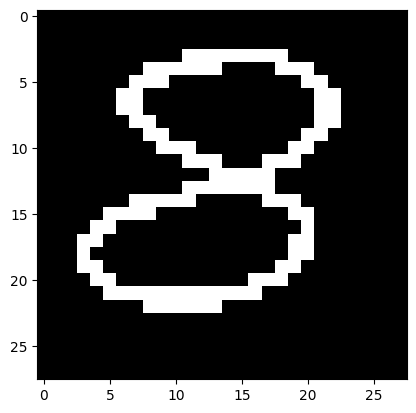

In [ ]:
arr = ["Image1.jpg", "Image2.jpg", "Image3.jpg", "Image4.jpg", "Image5.jpg", "Image6.jpg", "Image7.jpg", "Image8.jpg", "Image9.jpg"]
my_data = np.array([])
for i in arr:
    image = plt.imread(i)
    tf_img = tf.convert_to_tensor(image)
    resized_img = tf.image.resize(tf_img, [28, 28])
    tf_gray_img = tf.image.rgb_to_grayscale(resized_img)
    new_img = tf.squeeze(tf_gray_img, axis = -1)
    final_img = new_img / 255
    np_final_img = np.array(final_img)
    for j in range(np_final_img.shape[0]):
        for k in range(np_final_img.shape[1]):
            if np_final_img[j][k] >= 0.9:
                np_final_img[j][k] = 0
            else:
                np_final_img[j][k] = 1
    my_data = np.append(my_data, np_final_img)
my_data = my_data.reshape(-1, 28, 28)

plt.imshow(my_data[8], cmap = "grey")

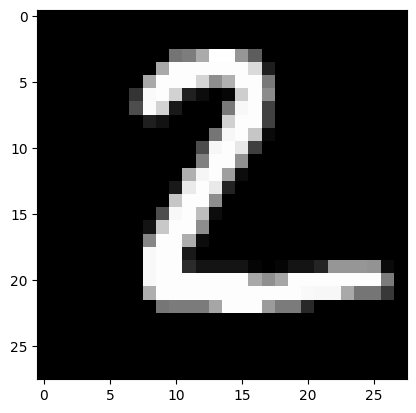

In [ ]:
plt.imshow(test_images[1], cmap = "grey")

In [ ]:
my_labels = np.array([1, 2, 3, 1, 1, 8, 5, 2, 8])
print(type(my_labels))
print(my_labels.shape)

<class 'numpy.ndarray'>
(9,)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(768, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)

])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

start = time.time()
model.fit(train_images, train_labels, epochs=5, batch_size = 100)

test_loss, test_acc = model.evaluate(my_data, my_labels)
end = time.time()
print("Time:", (end-start))
print('Test accuracy:', test_acc)

Epoch 1/5
600/600 [==============================] - 7s 11ms/step - loss: 0.2014 - accuracy: 0.9384
Epoch 2/5
600/600 [==============================] - 7s 11ms/step - loss: 0.0812 - accuracy: 0.9745
Epoch 3/5
600/600 [==============================] - 7s 11ms/step - loss: 0.0542 - accuracy: 0.9829
Epoch 4/5
600/600 [==============================] - 7s 11ms/step - loss: 0.0397 - accuracy: 0.9870
Epoch 5/5
1/1 [==============================] - 0s 91ms/step - loss: 1.3657 - accuracy: 0.6667
Time: 34.18513107299805
Test accuracy: 0.6666666865348816


# Q2 The Reuters newswire data

(10 points)

Consider the data in  `tensorflow.keras.datasets.reuters` and train a network which reliably categorizes the newswires.  

Hints:
- some general explanations of all the datasets included in Keras is here: https://keras.io/datasets/
After `from tensorflow.keras.datasets import reuters` you can get the dataset and the word index with through `reuters.get_word_index()` and `reuters.load_data()`.  The training labels correspond to different topics for each newswire.  The list of topics can be found here: https://github.com/keras-team/keras/issues/12072.
- Always look at your data, before you feed it into a network!
- Coherence of presentation is key.  Provide explanations of what you are doing and why you are doing it.
- Note that it is expected and allowed to obtain inspiration for solving this task from the Internet. However, all sources need to be clearly cited!  
- Provide coherent explanations on what improves performance or not.
- Code without explanation will not yield points.



The following model generates a neural networks that can reliably categorise the test data into one of the 46 classes with an accuracy of ~74% within ~20s. The model uses a softmax layer of 46 nodes to assign a probabilistic distribution to each of the 46 nodes. The sparse categorical crossentropy loss function can then attribute this to one of the corresponding 46 labels to improve them model. Sparse categorical crossentropy was used because it is a multi-class loss function that expects the labels to be integer values (which they are in this case) rather than one-hot representation. The batch size was set to 24 as this produces the optimal accuracy and does not compromise the computational time. The epoch was set to 50 as this provided the highest accuracy without overfitting the model. After ~100 epochs the model would begin to overfit decreasing the accuracy of the model. There was little to no improvement in accuracy between 50-100 but the computational time increased, therefore, 50 has been chosen as the parameter for epoch. The padding size was set to 256 as increasing this value led to overfitting as the model could not generalise patterns as well leading to greater selection of incorrect labeling (i.e. accuracy decrease). Using lower values for padding also resulted in a similar decrease in a accuracy as there was less data to use to select accurate patterns that represent the category. Values of similar size to 256 (i.e. 200-300) had no substantial effect on either the accuracy nor computational time. The vocab size was selected as 10000 as this provided an increase in accuracy without substantially increasing the computational time. Setting the vocab as >35000 let to overfitting on the model and therefore decreased the accuracy of the model. The size of the validation dataset was 2500 leaving the training dataset with a size of 6482. Increasing the validation set past 3000 saw a significant decrease in accuracy with little improvement for computational time. This is because there is a smaller dataset being used for training the dataset which reduces the ability of the neural networks to learn the patterns needed to identify the classification. Decreasing it below 2500 saw little to no improvement in accuracy but computational time continued to increase, therefore 2500 will be used. The model consisted of a embedding layer(10000, 16), global layer, a dense layer(16, relu) and another dense layer(46, softmax). These were used as any additional layers or nodes resulted in little to no increase in accuracy while increasing the computational time. Reducing the layers or nodes resulted in a significant decrease in accuracy withi only a marginal decrease in computational time.

The loss and accuracy of the model are plotted below to indicate the efficiency and suitability of the model for classification.

In [ ]:
vocab_size = 10000

# Creating a word and reverse word index for the reuters dataset

reuters = tf.keras.datasets.reuters
word_index = reuters.get_word_index()

for k in word_index:
    word_index[k] += 3
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = {word_index[k]: k for k in word_index}

# Pad sequences using word_index
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=vocab_size)
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data, value=word_index["<PAD>"], padding='post', maxlen=256)
test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"], padding='post', maxlen=256)

# The model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(46, activation=tf.nn.softmax)
])

model.summary()

model.compile(optimizer=tf.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=['acc'])

train_N = 2500
x_val = train_data[:train_N]
partial_x_train = train_data[train_N:]

y_val = train_labels[:train_N]
partial_y_train = train_labels[train_N:]

start = time.time()
history = model.fit(partial_x_train, partial_y_train, epochs=50,
                    batch_size=24, validation_data=(x_val, y_val), verbose=1)

model.evaluate(test_data, test_labels)
end = time.time()
print("Time:", (end-start))

Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_61 (Embedding)    (None, None, 16)          160000    
                                                                 
 global_average_pooling1d_6  (None, 16)                0         
 1 (GlobalAveragePooling1D)                                      
                                                                 
 dense_136 (Dense)           (None, 16)                272       
                                                                 
 dense_137 (Dense)           (None, 46)                782       
                                                                 
Total params: 161054 (629.12 KB)
Trainable params: 161054 (629.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
271/271 [==============================] - 1s 2ms/step - loss: 2.924

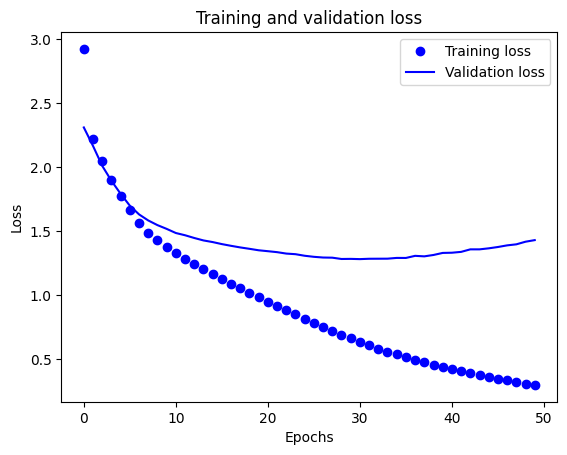

In [ ]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = history.epoch

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

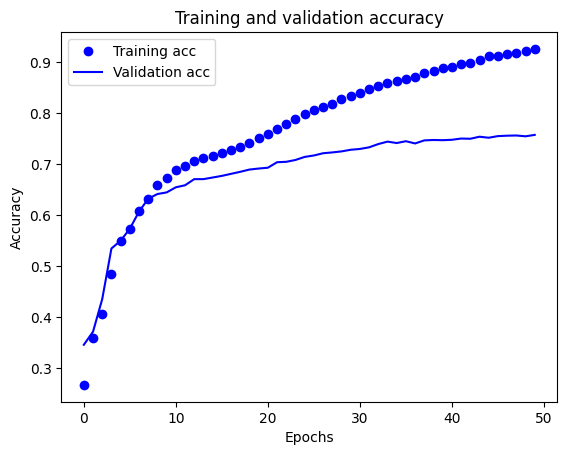

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()